# Cross Validation

👇 Import the `university_admissions.csv` dataset located in the data folder and display its first 5 rows

In [2]:
import pandas as pd

data = pd.read_csv('data/university_admissions.csv')

data.head()

,rating,CGPA,admitted
0,4,9.88,True
1,4,8.30,True
2,3,6.59,False
3,4,8.96,True
4,1,5.74,True


The dataset:
- `rating` : the rating of the university in a range [0,5]
- `CGPA` : the Cumulative Grade Points Average of the student
- `admitted` : whether or not a student is admitted to the university
    
The task is to predict if a student will be admitted or not considering his CGPA and the rating of the university he is applying to.

## Data Exploration

👇 How many observations are there in the dataset?

In [3]:
len(data)

50

👇 How many observations of each class?

In [7]:
data.admitted.value_counts()

False    26
True     24
Name: admitted, dtype: int64

## Baseline Score

👇 Generate a cross-validated baseline score with Sklearn's `DummyClassifier`
- Use the baseline strategy and scoring metric you feel are appropriate for the task
- Do not preprocess the features just yet

👉 [`DummyClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)


<details>
<summary> 💡Hints </summary>

- As a baseline score srategy, you could choose to always predict the most frequent class, or to generate predictions by respecting the training set’s class distribution.
    

- Since the classes are balanced and both equally as important, you can use the accuracy metric to score the baseline

</details>



In [5]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

# Ready X and y
X = data[['rating','CGPA']]
y = data['admitted']

# Baseline model
baseline_model = DummyClassifier(strategy="most_frequent")

# Cross validate model
baseline_cv = cross_validate(baseline_model, X, y, cv=10)

# Baseline Accuracy
baseline_cv['test_score'].mean()

0.5199999999999999

##  KNN model

👇 Cross-validate a `KNeighborsClassifier` using the same metric as your baseline. 
- Do not preprocess the features just yet

👉 [`cross_validate` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

# Cross validate model
log_cv_results = cross_validate(KNeighborsClassifier(), X, y, cv=10)

# KNN Accuracy
log_cv_results['test_score'].mean()

0.76

You should be getting an accuracy above 70%, an improvement from the baseline score! However, it could be better. Remember that KNN models are extremely sensitive to magnitude of features?

## Advanced KNN model

👇 Check the distribution of the features and scale them accordingly. With the scaled features, cross-validate a `KNeighborsClassifier`.

0.78

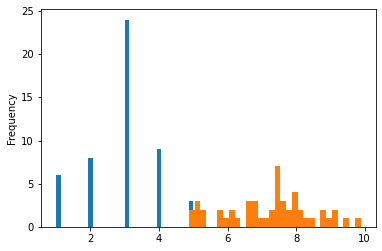

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Check feature distribution with histograms
data.rating.plot.hist(bins=30)
data.CGPA.plot.hist(bins=30)

# Scale features
scaler = MinMaxScaler().fit(data[['rating','CGPA']])
X_scaled = scaler.transform(data[['rating','CGPA']])

# Cross validate KNN with scaled features
log_cv_results = cross_validate(KNeighborsClassifier(), X_scaled, y, cv=10, 
                            scoring=['accuracy'])

# Scale features modelling accuracy
log_cv_results['test_accuracy'].mean()

Scaling the features should have improved the performance of the model!

## Predictions

A friend of yours with a CGPA of 8 has just applied to a university of rating 4. 

👇 Use your model to let him know if he will get in. Make sure you scale your friend's data with the same scaler you use on the training data.

In [11]:
# Make list with datapoints
friend = [4,8]

# Scale using original scaler
new_scaled = scaler.transform([friend])

# Train a model on the scaled data
model = KNeighborsClassifier().fit(X_scaled,y)

# Predict
model.predict(new_scaled)[0]

True

⚠️ Please, push the exercice once you have completed it. Thank you 🙃

# 🏁